# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/fellmir/pyMachineLearningMasterclass/main/input_data/moviereviews.csv')

In [5]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [7]:
df.tail()

,label,review
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...
1999,pos,"a couple of months ago , when i first download..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [9]:
df.describe()

,label,review
count,2000,1965
unique,2,1939
top,neg,
freq,1000,27


In [10]:
df.shape

(2000, 2)

In [11]:
df.columns

Index(['label', 'review'], dtype='object')

In [12]:
df.dtypes

label     object
review    object
dtype: object

In [13]:
df.nunique()

label        2
review    1939
dtype: int64

In [14]:
df['label'].value_counts()

neg    1000
pos    1000
Name: label, dtype: int64

**TASK: Check to see if there are any missing values in the dataframe.**

In [6]:
# CODE HERE
df.isnull().sum()

label      0
review    35
dtype: int64

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(1965, 2)

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [19]:
blank_reviews = df[df['review'].str.isspace() | (df['review'] == '')] # | = OR

print(f"There are {len(blank_reviews)} blank reviews.")

There are 27 blank reviews.


27

In [20]:
blank_reviews

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [21]:
df = df[~(df['review'].str.isspace() | (df['review'] == ''))] # ~ = NOT

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [23]:
# CODE HERE
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [24]:
# CODE HERE
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
reviews_label_neg = df[df['label'] == 'neg']['review']
reviews_label_pos = df[df['label'] == 'pos']['review']

cv = CountVectorizer(stop_words='english')

In [26]:
cv_neg = CountVectorizer(stop_words='english')
cv_pos = CountVectorizer(stop_words='english')

In [27]:
word_count_label_neg = cv_neg.fit_transform(reviews_label_neg)
word_count_label_pos = cv_pos.fit_transform(reviews_label_pos)

In [28]:
feature_names_neg = cv_neg.get_feature_names_out()
feature_names_pos = cv_pos.get_feature_names_out()

In [29]:
df_word_count_neg = pd.DataFrame(word_count_label_neg.toarray(), columns=feature_names_neg)
df_word_count_pos = pd.DataFrame(word_count_label_pos.toarray(), columns=feature_names_pos)

In [30]:
top_words_label_neg = df_word_count_neg.sum().sort_values(ascending=False).head(20)
top_words_label_pos = df_word_count_pos.sum().sort_values(ascending=False).head(20)

In [31]:
top_words_label_neg

film          4063
movie         3131
like          1808
just          1480
time          1127
good          1117
bad            997
character      926
story          908
plot           888
characters     838
make           813
really         743
way            734
little         696
don            683
does           666
doesn          648
action         635
scene          634
dtype: int64

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [32]:
top_words_label_pos

film          5002
movie         2389
like          1721
just          1273
story         1199
good          1193
time          1175
character     1037
life          1032
characters     957
way            864
films          851
does           828
best           788
people         769
make           764
little         751
really         731
man            728
new            702
dtype: int64

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [33]:
# CODE HERE
X = df['review']
y = df['label']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [36]:
# CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('svc', LinearSVC()),
])

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC())])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [38]:
# CODE HERE
predictions = pipeline.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

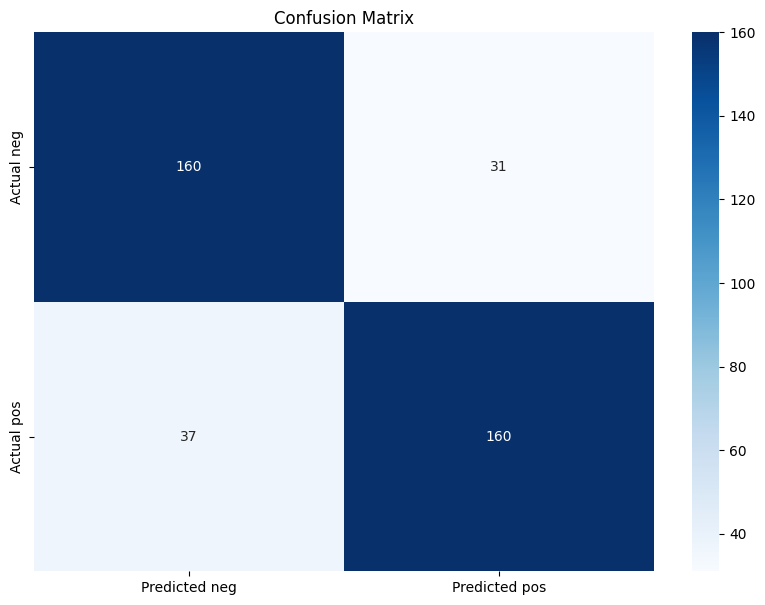

In [41]:
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(cm, index=['Actual neg', 'Actual pos'], columns=['Predicted neg', 'Predicted pos'])

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

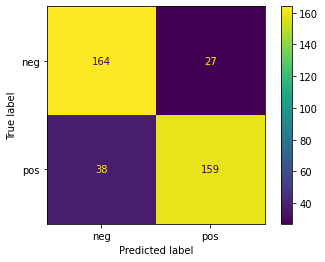

## Great job!